In [212]:
import librosa  
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import noisereduce as nr
import fnmatch
from jupyterthemes import jtplot

In [3]:
jtplot.style(theme='monokai', context='notebook', ticks=True, gridlines='--')

In [265]:
wavFolder = os.path.join("bird_data","wav_files")
wavFiles = os.listdir(wavFolder)
example = os.path.join(wavFolder, wavFiles[0])

In [254]:
# features folder
feat = os.path.join("bird_data","features")
# linear-frequency power features
freq_train_folder = os.path.join(feat,"freq_power_features", "train")
freq_test_folder = os.path.join(feat,"freq_power_features", "test")
freq_val_folder = os.path.join(feat,"freq_power_features", "val")
# mel features
mel_train_folder = os.path.join(feat,"mel_features", "train")
mel_test_folder = os.path.join(feat,"mel_features", "test")
mel_val_folder = os.path.join(feat,"mel_features", "val")
# mfcc features
mfcc_train_folder = os.path.join(feat,"mfcc_features", "train")
mfcc_test_folder = os.path.join(feat,"mfcc_features", "test")
mfcc_val_folder = os.path.join(feat,"mfcc_features", "val")

In [255]:
audioData = pd.read_csv(os.path.join("bird_data", "audioData_wav_.csv"))

In [256]:
audioData.head()

,American_Goldfinch,American_Robin,Barn_Swallow,Blue_Jay,Blue-grey_Gnatcatcher,Carolina_Chickadee,Carolina_Wren,Cedar_Waxwing,Northern_Cardinal,Ruby-crowned_Kinglet
0,American_Goldfinch_XC114342.wav,American_Robin_XC112597.wav,Barn_Swallow_XC113501.wav,Blue_Jay_XC110056.wav,Blue-grey_Gnatcatcher_XC130506.wav,Carolina_Chickadee_XC111140.wav,Carolina_Wren_XC112512.wav,Cedar_Waxwing_XC121795.wav,Northern_Cardinal_XC110059.wav,Ruby-crowned_Kinglet_XC131366.wav
1,American_Goldfinch_XC124312.wav,American_Robin_XC114082.wav,Barn_Swallow_XC123032.wav,Blue_Jay_XC114085.wav,Blue-grey_Gnatcatcher_XC130507.wav,Carolina_Chickadee_XC112508.wav,Carolina_Wren_XC116314.wav,Cedar_Waxwing_XC121796.wav,Northern_Cardinal_XC112830.wav,Ruby-crowned_Kinglet_XC131957.wav
2,American_Goldfinch_XC133564.wav,American_Robin_XC114083.wav,Barn_Swallow_XC123035.wav,Blue_Jay_XC116372.wav,Blue-grey_Gnatcatcher_XC130508.wav,Carolina_Chickadee_XC112509.wav,Carolina_Wren_XC122447.wav,Cedar_Waxwing_XC121797.wav,Northern_Cardinal_XC130962.wav,Ruby-crowned_Kinglet_XC138055.wav
3,American_Goldfinch_XC133565.wav,American_Robin_XC122037.wav,Barn_Swallow_XC123036.wav,Blue_Jay_XC116373.wav,Blue-grey_Gnatcatcher_XC130511.wav,Carolina_Chickadee_XC112510.wav,Carolina_Wren_XC125657.wav,Cedar_Waxwing_XC121798.wav,Northern_Cardinal_XC130966.wav,Ruby-crowned_Kinglet_XC156726.wav
4,American_Goldfinch_XC141469.wav,American_Robin_XC130246.wav,Barn_Swallow_XC123066.wav,Blue_Jay_XC116374.wav,Blue-grey_Gnatcatcher_XC130512.wav,Carolina_Chickadee_XC112633.wav,Carolina_Wren_XC125658.wav,Cedar_Waxwing_XC121799.wav,Northern_Cardinal_XC141210.wav,Ruby-crowned_Kinglet_XC159571.wav


In [257]:
wav_df = audioData.sample(frac=1).reset_index(drop=True)
wav_df.head()

,American_Goldfinch,American_Robin,Barn_Swallow,Blue_Jay,Blue-grey_Gnatcatcher,Carolina_Chickadee,Carolina_Wren,Cedar_Waxwing,Northern_Cardinal,Ruby-crowned_Kinglet
0,American_Goldfinch_XC334891.wav,American_Robin_XC161561.wav,Barn_Swallow_XC190564.wav,Blue_Jay_XC168076.wav,Blue-grey_Gnatcatcher_XC291617.wav,Carolina_Chickadee_XC358104.wav,Carolina_Wren_XC295852.wav,Cedar_Waxwing_XC363168.wav,Northern_Cardinal_XC288484.wav,Ruby-crowned_Kinglet_XC352807.wav
1,American_Goldfinch_XC313060.wav,American_Robin_XC160745.wav,Barn_Swallow_XC190324.wav,Blue_Jay_XC167820.wav,Blue-grey_Gnatcatcher_XC263484.wav,Carolina_Chickadee_XC358097.wav,Carolina_Wren_XC285280.wav,Cedar_Waxwing_XC314414.wav,Northern_Cardinal_XC266638.wav,Ruby-crowned_Kinglet_XC319514.wav
2,American_Goldfinch_XC383905.wav,American_Robin_XC163685.wav,Barn_Swallow_XC190652.wav,Blue_Jay_XC168085.wav,Blue-grey_Gnatcatcher_XC313507.wav,Carolina_Chickadee_XC362250.wav,Carolina_Wren_XC309314.wav,Cedar_Waxwing_XC420964.wav,Northern_Cardinal_XC309821.wav,Ruby-crowned_Kinglet_XC389093.wav
3,American_Goldfinch_XC158924.wav,American_Robin_XC134500.wav,Barn_Swallow_XC123069.wav,Blue_Jay_XC130505.wav,Blue-grey_Gnatcatcher_XC134759.wav,Carolina_Chickadee_XC121930.wav,Carolina_Wren_XC141281.wav,Cedar_Waxwing_XC121802.wav,Northern_Cardinal_XC142500.wav,Ruby-crowned_Kinglet_XC159694.wav
4,American_Goldfinch_XC205514.wav,American_Robin_XC160026.wav,Barn_Swallow_XC178328.wav,Blue_Jay_XC163419.wav,Blue-grey_Gnatcatcher_XC205774.wav,Carolina_Chickadee_XC234311.wav,Carolina_Wren_XC210847.wav,Cedar_Waxwing_XC276800.wav,Northern_Cardinal_XC202181.wav,Ruby-crowned_Kinglet_XC233657.wav


In [258]:
wav_df.shape

(100, 10)

In [259]:
# Train, Test and Validation sets
train_df = wav_df.head(70)
test_df = wav_df.tail(20).reset_index(drop=True)
val_df = wav_df.iloc[70:80].reset_index(drop=True)

In [260]:
# Transfer row values of a df to a list
def df_to_list(df):
    alist=[]
    for i in df.index:
        for c in df.columns:
            el = df.loc[i,c]
            alist.append(el)
    return alist

In [261]:
test_list=df_to_list(test_df)
train_list=df_to_list(train_df)
val_list=df_to_list(val_df)

# Audio Spectral Features


## Load Audio Signal Function

In [262]:
# Load signal and apply noise reduction if required
def loadSignal(file, downsample=True, denoise=False):
    SR = (22050 if downsample else 44100)
    signal, sr = librosa.load(file, sr=SR, mono=True)
    if denoise:
        rsignal = nr.reduce_noise(audio_clip=signal, noise_clip=signal, verbose=False)
        return rsignal, sr
    else:
        return signal, sr

## Spectrogram Functions

In [263]:
# Plot Raw signal
def RawSignal(FILE):
    signal, sr = loadSignal(FILE, True, True)
    plt.figure(figsize=(10, 4))
    librosa.display.waveplot(signal, sr=sr)
    plt.title(f'Monophonic signal for {FILE[20:-13]}')
    plt.show()

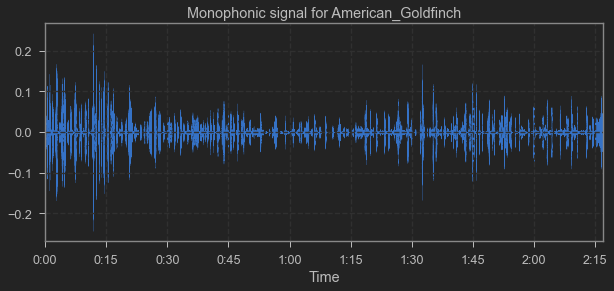

In [266]:
RawSignal(example)

In [267]:
# Linear-frequency power spectrogram
def Feq_Spectrogram(FILE, PATH=False):
    signal, sr = loadSignal(FILE, True, True)  
    spectra= librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    fig, ax = plt.subplots(figsize=(10, 4), frameon=False)
    img=librosa.display.specshow(spectra, y_axis='linear', x_axis='time')
    if PATH:
        ax.set_axis_off()
        fig.savefig(PATH)
        fig.clear()
        ax.cla()
        plt.clf()
        plt.close('all')
    else:
        fig.colorbar(img, ax=ax)
        title = f'Linear-frequency power spectrogram for {FILE[20:-13]}'
        ax.set(title=title)
        plt.show() 

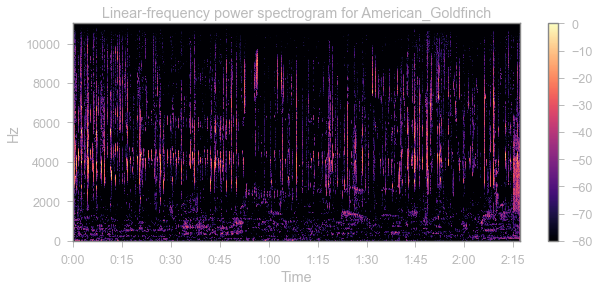

In [268]:
# Example of Linear-freq power spectrogram
Feq_Spectrogram(example)

In [269]:
# Plot mel-spectrogram
def Mel_Spectrogram(FILE, N_FFT, HOP_LENGTH, WINDOW, FILTER=False, PATH=False):
    FMIN = (1400 if FILTER else 0)
    signal, sr = loadSignal(FILE, True, True)  
    mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=N_FFT, hop_length=HOP_LENGTH, htk=True, window=WINDOW, fmin=FMIN, fmax=sr/2) 
    S_dB = librosa.power_to_db(mel**2,ref=np.max)
    fig, ax = plt.subplots(figsize=(10, 4), frameon=False)
    librosa.display.specshow(S_dB, fmin=FMIN, y_axis='linear', x_axis='time')
    if PATH:
        ax.set_axis_off()
        fig.savefig(PATH)
        fig.clear()
        ax.cla()
        plt.clf()
        plt.close('all')
    else:
        plt.colorbar(format='%+2.0f dB')
        title = ('Mel-scaled spectrogram with high-pass filter' if FILTER else 'Mel-scaled spectrogram')
        plt.title(title+" for "+FILE[20:-13])
        plt.show()

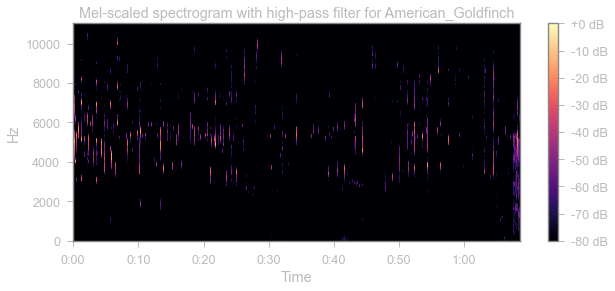

In [270]:
#Example Mel Spectrogram with hihg-pass filter
Mel_Spectrogram(example, 1024, 1024, 'hann', True)

In [271]:
# Mel-frequency cepstral coefficients (MFCCs)
def MFCC(FILE, N_FFT, N_MFCC, HOP_LENGTH, DCT=2, FILTER=False, PATH=False):
    LIFTER=(2*N_MFCC if FILTER else 0) # cesptral filtering
    signal, sr = loadSignal(FILE, True, True)  
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_fft = N_FFT, n_mfcc=N_MFCC, hop_length=HOP_LENGTH, htk=True, lifter=LIFTER, dct_type=DCT)
    fig, ax = plt.subplots(figsize=(10, 4), frameon=False)
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)  
    if PATH:
        ax.set_axis_off()
        fig.savefig(PATH)
        fig.clear()
        ax.cla()
        plt.clf()
        plt.close('all')
    else:
        fig.colorbar(img, ax=ax)
        title = ('MFCC with cepstral filtering' if FILTER else 'MFCC')
        ax.set(title=title+" for "+FILE[20:-13])
        plt.show()
    

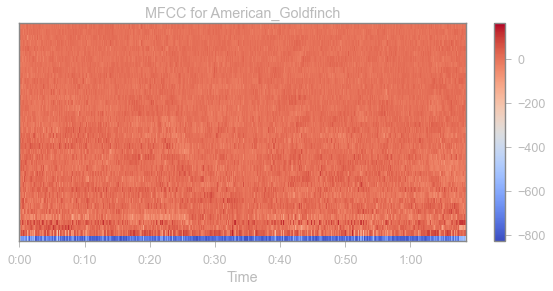

In [272]:
# Example of MFCC (no cepstal filtering)
MFCC(example, 1024, 40, 1024)

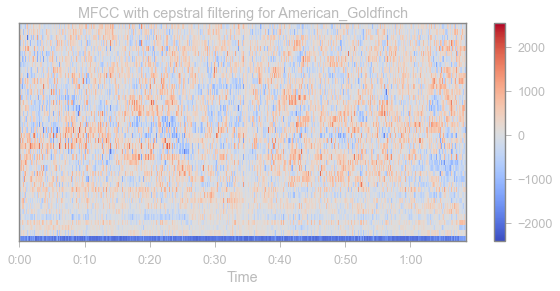

In [273]:
# Example of MFCC with cepstal filtering
MFCC(example, 1024, 40, 1024, 2, True)

In [274]:
def _save_Spectra_(lista, origin, destination, feature='MFCC'):
    for l in tqdm(lista):
        origin_path=os.path.join(origin,l)
        name = f'{l[:-3]}png'
        destination_path=os.path.join(destination, name)
        if feature=='MFCC':
            MFCC(origin_path, 1024, 40, 1024, 2, True, destination_path)
        elif feature=='MEL':
            Mel_Spectrogram(origin_path, 1024, 1024, 'hann', False, destination_path)
        elif feature=='FEQ':
            Feq_Spectrogram(origin_path, destination_path) 

In [275]:
def _save_Spectra_2(df, origin, destination, feature='MFCC'):
    lista=df_to_list(df)
    classes=df.columns
    for l in tqdm(lista):
        for c in classes:
            if fnmatch.fnmatch(c, l[:-13]):
                try:
                    os.mkdir(os.path.join(destination,c))
                    class_folder=os.path.join(destination,c)
                except:
                    class_folder=os.path.join(destination,c)
                origin_path=os.path.join(origin,l)
                destination_path=os.path.join(class_folder, f'{l[:-3]}png')
        if feature=='MFCC':
            MFCC(origin_path, 1024, 40, 1024, 2, True, destination_path)
        elif feature=='MEL':
            Mel_Spectrogram(origin_path, 1024, 1024, 'hann', False, destination_path)
        elif feature=='FEQ':
            Feq_Spectrogram(origin_path, destination_path) 

In [ ]:
# Save MFCC val dataset
_save_Spectra_2(val_df, wavFolder, mfcc_test_folder)

In [233]:
# Save MFCC test dataset
_save_Spectra_2(test_df, wavFolder, mfcc_test_folder)

100%|██████████| 200/200 [10:05<00:00,  3.03s/it]


In [234]:
# Save MFCC train dataset
_save_Spectra_2(train_df, wavFolder, mfcc_train_folder)

100%|██████████| 800/800 [38:55<00:00,  2.92s/it]  
